<a href="https://colab.research.google.com/github/Chhaya-cloud/Chatbot/blob/main/Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Importing the data
df = pd.read_csv('/content/sample_data/boston.csv', index_col=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Separating the input and output data
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [9]:
# Performing the test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [10]:
# creating the randomforestregressor
rf = RandomForestRegressor(random_state=3)

In [11]:
# fiting the data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=3)

In [12]:
# Taking predictions from the model
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

In [13]:
# Model Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Training RMSE: ', np.round(metrics.mean_squared_error(y_train, y_train_pred),3 ))
print('Testing RMSE: ', np.round(metrics.mean_squared_error(y_test, y_pred),3 ))
print('Training R2 Score:', np.round(metrics.r2_score(y_train, y_train_pred),3))
print('Testing R2 Score:', np.round(metrics.r2_score(y_test, y_pred),3))



Training RMSE:  1.484
Testing RMSE:  9.607
Training R2 Score: 0.983
Testing R2 Score: 0.877


In [ ]:
# Comment - From the above model, we can say that model is overfitted
# Perform hyper parameter optimization
#using GrideSearchCV and RandomizedSearchCV

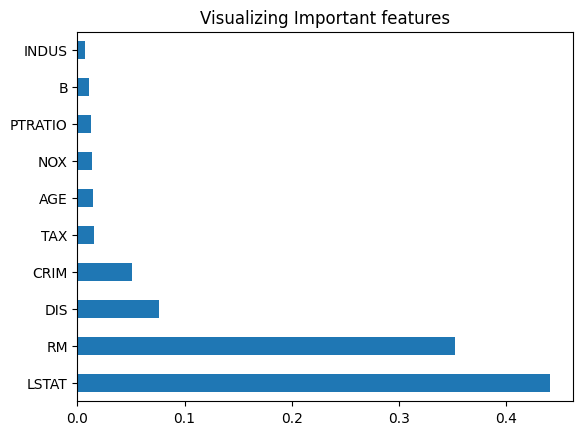

In [14]:
# Feature importance plot
feat_imp = pd.Series(rf.feature_importances_, index=X.columns,).sort_values(ascending=False)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Visualizing Important features')
plt.show()

In [15]:
# Performing Hyper parameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [16]:
Params = {'n_estimators': [100, 200, 300, 400, 500],
          'max_depth': [5, 10, 15, 20, 25],
          'min_samples_split': [2, 5, 10, 15, 20],
          'min_samples_leaf': [1, 2, 5, 10, 15]}

In [17]:
5*5*5*5

625

In [18]:
# Using GridsearchCV
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=Params, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_le

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=3),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [19]:
# Getting the best parameter combination
print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [20]:
# Creating the Optimal Model
rf_optimal = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=2, min_samples_leaf=1, random_state=3)
rf_optimal.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=3)

In [21]:
# Taking predictions from the model
y_pred = rf_optimal.predict(X_test)
y_train_pred = rf_optimal.predict(X_train)

In [22]:
# Model Evaluation on training data
print('Training RMSE: ', np.round(metrics.mean_squared_error(y_train, y_train_pred),3 ))
print('Testing RMSE: ', np.round(metrics.mean_squared_error(y_test, y_pred),3 ))

Training RMSE:  1.489
Testing RMSE:  9.619


In [ ]:
# RandomizedSearchCV()

In [24]:
Params = {'n_estimators': [100, 200, 300, 400, 500],
         'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [25]:
5*10*9*10

4500

In [26]:
# Fitting the RandomizedSearchCV()
random_search = RandomizedSearchCV(estimator=model, param_distributions=Params, cv=5, verbose=2, n_iter=100)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.0s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.8s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=500; total time=   0.8s
[CV] END max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=500; total time=   0.8s
[CV] END max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=500; total time=   1.1s
[CV] END max_depth=1, min_samples_lea

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=3),
                   n_iter=100,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [27]:
# Getting the beat parameters
print(random_search.best_params_)

{'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 10}


In [28]:
# Creating the Optimal Model
rf_optimal = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=3)
rf_optimal.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=3)

In [29]:
# Taking predictions from the model
y_pred = rf_optimal.predict(X_test)
y_train_pred = rf_optimal.predict(X_train)

In [30]:
# Model Evaluation on training data
print('Training RMSE: ', np.round(metrics.mean_squared_error(y_train, y_train_pred),3 ))
print('Testing RMSE: ', np.round(metrics.mean_squared_error(y_test, y_pred),3 ))

Training RMSE:  1.746
Testing RMSE:  9.5


In [ ]:
#  The model is still overfitted